In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn import tree, svm, datasets, metrics, preprocessing
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from utilities import plot_2d_data, plot_2d_classifier, plot_confusionmatrix
from utilities import learning_curve_model, validation_curve_model, plot_learning_curve
from scipy import stats
import seaborn as sns
import os
import timeit

from utilities import get_colors
cm = get_colors(colormap='RdBu', n_colors=2)

In [3]:
data = pd.read_csv("./data/bank.csv")
data.shape

(11162, 17)

In [4]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data = data.apply(LabelEncoder().fit_transform)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [6]:
data_X = data.drop(columns = ['deposit'], axis=1)/256
data_y = data['deposit']
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=100)

In [7]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [ ]:
dtc = tree.DecisionTreeClassifier(random_state=100)
dtc.fit(train_X, train_y)

In [ ]:
train_size=np.linspace(.1, 1.0, 15)
learning_curve_model(data_X, data_y, dtc, cv, train_size)
plt.show()

In [ ]:
predict_y_train = dtc.predict(train_X)
predict_y = dtc.predict(test_X)
print(f"Training accuracy score: {100* accuracy_score(train_y, predict_y_train)}%")
print(f"Testing accuracy Score: {100* accuracy_score(test_y, predict_y)}%")

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

title = "Learning Curves (Unpruned Decision Tree)"
dtc = tree.DecisionTreeClassifier(random_state=100)
plot_learning_curve(dtc, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (Pre-pruned Decision Tree)"
dtc_pre = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)
plot_learning_curve(dtc_pre, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (Post-pruned Decision Tree)"
dtc_post = tree.DecisionTreeClassifier(ccp_alpha=0.018, random_state=100)
plot_learning_curve(dtc_post, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01), cv=cv, n_jobs=4)


plt.show()

### Neural Network

<ipython-input-19-0c072a604492>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(clf1.loss_curve_)


ValueError: Single argument to subplot must be a three-digit integer, not [0.7390047969284285, 0.7197549827462775, 0.7056664735687113, 0.6948261594230245, 0.6864521936208104, 0.6792863175072849, 0.6731046971702702, 0.6672299764329505, 0.6617575790672012, 0.656430753377335, 0.6511021904951454, 0.6459226823502655, 0.6408410821956037, 0.635812204719429, 0.6308476650725562, 0.626186389026821, 0.6216501459585395, 0.617046852089783, 0.6125139591988321, 0.608262936434686, 0.6043007752326625, 0.6005921264513381, 0.5965414928340285, 0.5930426157707815, 0.5896992202870155, 0.5862928811990944, 0.5834755935977652, 0.580419665777869, 0.5776102930104596, 0.5750698981718192, 0.5725500648208312, 0.5702984555529536, 0.5680602467707033, 0.565971853355699, 0.5640177598001535, 0.5620615757411436, 0.5604200307655602, 0.5586804514173259, 0.5571952814950862, 0.5556106634611133, 0.5544132491464553, 0.5535277313036112, 0.5522654877181888, 0.5510560957350576, 0.5497635272811275, 0.5487578826631551, 0.5478434728423608, 0.5470568263679177, 0.5462776353337631, 0.5453387323229197, 0.5447470470963847, 0.5441478605163381, 0.5434140797641779, 0.5427798557338556, 0.5423593597171911, 0.5418604899776132, 0.541814064197073, 0.5412783913642307, 0.5408592875895282, 0.5401911466072874, 0.5401148080921085, 0.539697466392755, 0.5392991861018575, 0.5389783185163652, 0.5386883079526906, 0.5385993751570952, 0.5381921498492451, 0.5382599366199873, 0.5378940176661537, 0.5376942769082177, 0.5376603937613029, 0.5375003756846678, 0.5372270629493722, 0.5371977727540684, 0.5368792551758048, 0.5367567395280617, 0.5367871477589837, 0.5364592243342046, 0.5363397147572304, 0.5361859009781115, 0.5360694590374319, 0.5363065171101508, 0.5358292657937413, 0.5358234026778923, 0.5356474873030108, 0.5355770916810966, 0.5358500055923253, 0.5355698100417764, 0.5358984116859001, 0.5354115792703733, 0.5353093987237795, 0.5353634261933482, 0.5352603877860931, 0.535033941382073, 0.5351350986234075, 0.5349724291757899, 0.5348355230326564, 0.5347875113291877, 0.5348775095112195, 0.5347171679426389, 0.5348041260482045, 0.5345662608508713, 0.5346453140444046, 0.5350168113963999, 0.5352632068081405, 0.5344639627135459, 0.5343249647064379, 0.534430442428418, 0.5342801325146352, 0.5345598278354129, 0.5341966589463447, 0.5339873908670014, 0.5340586166713531, 0.5340644716272638, 0.5339294068335214, 0.5338134840660672, 0.5338665096463804, 0.5338229978751501, 0.5338319708616541, 0.533648208428677, 0.5337719411209578, 0.5333362010360132, 0.5335216839175483, 0.5334320449233316, 0.5331932668744267, 0.5333440622861878, 0.5332281154535005, 0.5333448157758728, 0.5333029519475699, 0.533055403378163, 0.5329140043714616, 0.5326714364681628, 0.5326111749861108, 0.5325357944835584, 0.5324961630389567, 0.5323767090530004, 0.5324713244935181, 0.5322793817687781, 0.532164999739577, 0.5320641647136839, 0.5323358237353298, 0.5322683179138405, 0.5320488430130927, 0.5319049413393862, 0.5320824047292224, 0.5318232860651154, 0.5317876965641939, 0.531633298328742, 0.5315852011015149, 0.5317510478123306, 0.5316816620331231, 0.53183629913146, 0.5315733905998966, 0.5316107127033101, 0.5313804160187554, 0.5313788454359866, 0.531176286347005, 0.5311759886342399, 0.5309811808197817, 0.5311467898614226, 0.5311691575222646, 0.5309123081040754, 0.5309039329705091, 0.5309200455857711, 0.5309907624812032, 0.5309698539692246, 0.5310982316925038, 0.5307953400804254, 0.5305246702391891, 0.5305129282983111, 0.5305664150523107, 0.5305365155855111, 0.5304577375883216, 0.5304263125784656, 0.5301922487688695, 0.5301214027021345, 0.5301537643503533, 0.5302612286060236, 0.530097295210597, 0.5304174869683537, 0.5299863299505719, 0.5299030266929197, 0.5298666772025674, 0.5296712739436538, 0.5295208870564074, 0.5294471288811831, 0.5294251952863159, 0.5296301464059864, 0.5293609317749155, 0.5291681837640281, 0.5291445672801695, 0.5289827541191606, 0.5289952305384568, 0.5290505516752073, 0.5289397991891321, 0.5289185382863899, 0.5289054378443557, 0.5287674022235808, 0.5290838034252675, 0.5287204418902647, 0.5285599755450298, 0.5289391267302672, 0.5282343329101831, 0.5283806381288955, 0.5282600311793529, 0.5282688331708384, 0.5282346819876841, 0.5283436656027675, 0.5283931329980831, 0.527937832636167, 0.5279746083870832, 0.528028744412342, 0.5279446404594652, 0.5280784906132641, 0.5277153908039416, 0.5277531094381943, 0.5276857958548912, 0.527529140730712, 0.5274171645782532, 0.5275037539598237, 0.5274648789077914, 0.5278171412372902, 0.5273677748032246, 0.52732362099041, 0.5274345059519701, 0.527213865129988, 0.5272030217014793, 0.5270296468644508, 0.5271938212497547, 0.5269438177804455, 0.5268383383205849, 0.5269571704934358, 0.5268137252732765, 0.5266748328025526, 0.5267197461180562, 0.5265748139509296, 0.5267877003857455, 0.5265826766069969, 0.5263913526679098, 0.5263793657913958, 0.5263413143311665, 0.5267209270132511, 0.5266816416971013, 0.5261806308387345, 0.5268541323301835, 0.5262177524314272, 0.5262699803890418, 0.5262014380572063, 0.5262093785449878, 0.5260964089638136, 0.5261100204530805, 0.5260594186050038, 0.5259311055051012, 0.5257555685695438, 0.5260550781018446, 0.5256058539470577, 0.525606514178951, 0.525402871157537, 0.5257300176351422, 0.5253501165513028, 0.5261780597025465, 0.525432280438262, 0.5254380642501681, 0.525333935736019, 0.5256517727633536, 0.5253041722540652, 0.5251104994437004, 0.5252591270363078, 0.5249215755529125, 0.5251323199720743, 0.5249390034177754, 0.5249630643004272, 0.5251910904353301, 0.5250881493340033, 0.5248733519916097, 0.5249193710261304, 0.5247019578857605, 0.524809211479535, 0.5247524998540986, 0.5245597039794295, 0.5243316595675095, 0.5248131780901906, 0.5243937450367305, 0.5243232507388852, 0.524263037799404, 0.5241201302227858, 0.524104290865112, 0.5240434554364082, 0.5238866602739845, 0.5240256794895126, 0.524088355011864, 0.523745616538222, 0.5239478878372842, 0.523590893581267, 0.5237594002193221, 0.5235891432349502, 0.5233350708132365, 0.5235185005953811, 0.5234470120416885, 0.5232908661206733, 0.5232210611787762, 0.523365837590434, 0.5230446436632571, 0.5227847655373077, 0.52296427927795, 0.5229924059445391, 0.5227397890161732, 0.5226556207314996, 0.5226686748501166, 0.5225729572353632, 0.5226032075063655, 0.5223720051939721, 0.5225434598230362, 0.5222612810419037, 0.5222696161083644, 0.5224307341688017, 0.5221315514002035, 0.5221095922012778, 0.521928875449541, 0.5220606171331693, 0.5220039564494792, 0.5219045415379793, 0.5219035210033454, 0.5218437579423303, 0.5217014473656371, 0.5217995251552575, 0.5214742265333372, 0.5222187367675435, 0.5212641307700523, 0.5213537131456448, 0.5214755494391885, 0.5212938047780863, 0.521172772444894, 0.5211184366690239, 0.5211662445288606, 0.5212476264093607, 0.5210371368894279, 0.5206467735233427, 0.5215446229319458, 0.520755339442393, 0.5209384314082064, 0.5206525807126621, 0.520550955830714, 0.5205387772647669, 0.5204660100356607, 0.5203110991873907, 0.520242279904145, 0.520200881136528, 0.5203126025017022, 0.5201970121457872, 0.5200673395050622, 0.5198208621137749, 0.5198709134638151, 0.519665962901982, 0.5202108045827084, 0.5197445630004437, 0.519472750755043, 0.5199626835983725, 0.5198191217554631, 0.5194602721211263, 0.5196640188307466, 0.519274458002732, 0.5191933642909528, 0.5190132504428713, 0.5191961513806699, 0.5191027791185872, 0.5189672495517534, 0.5190681619433783, 0.5186860334190165, 0.5189294814791868, 0.5186547033981741, 0.518659537565811, 0.5185932340951188, 0.5185553531887864, 0.5183835317975455, 0.5183676480505706, 0.5185624354813667, 0.5184899951065066, 0.5181878083188435, 0.5181214201275818, 0.5182216757059126, 0.5180405803186403, 0.5179896308737418, 0.518136931781121, 0.5179073179999591, 0.5180564035281728, 0.5177547697000977, 0.5175956522559507, 0.5176664281928717, 0.5177377012669749, 0.5176470183618587, 0.5174472149718543, 0.5175259057036379, 0.517642652320108, 0.5174197593226338, 0.5174213295388533, 0.5171961184564018, 0.517467860428698, 0.5174387181425532, 0.5171911361618625, 0.5170437221416277, 0.5171631712911622, 0.5168666013309624, 0.5167685766221496, 0.5171445075388781, 0.5166324089180857, 0.516585004018985, 0.5165690130038741, 0.5169294063444664, 0.5164659206241062, 0.5164420689412995, 0.5163171546149462, 0.516422192588757, 0.5162232420552105, 0.5165033579295794, 0.5164295441101945, 0.5164572826030999, 0.5160567752741936, 0.5161257598732417, 0.5161362865392533, 0.5159996433175597, 0.5159371911383953, 0.516085020731295, 0.515905384425309, 0.5158587615413829, 0.5158266374543883, 0.5157318621412491, 0.5154847362092225, 0.5154536696789696, 0.5156317340450247, 0.5155162817754839, 0.515742043116638, 0.5154836335093933, 0.5153830317141683, 0.5154802204550961, 0.5156446704526145, 0.5150736418754388, 0.5150239451789846, 0.5151409679021518, 0.5149461114109288, 0.5151244949840701, 0.5150868554182816, 0.5148480130791507, 0.5147204851668419, 0.5151903651641003, 0.5149923372505819, 0.5147977455081072, 0.5146617981374537, 0.5150255824818064, 0.5144996507460559, 0.5147463773944309, 0.5143187732618683, 0.5143119484227014, 0.514402323086943, 0.5143585688301083, 0.514341190848488, 0.5141419181254331, 0.5142836195940601, 0.5141055828472464, 0.5140679158810469, 0.5141686868719433, 0.5139649437862678, 0.5138881889680155, 0.5141283723912997, 0.5136692297616336, 0.5137648656904178, 0.513850262766807, 0.5139905016363249, 0.5135507138391227, 0.5135305331292419, 0.5137393567755265, 0.5135996712786727, 0.5135197407953052, 0.513415302124131, 0.5131710569878749, 0.5136068820159017, 0.5136345997296429, 0.5133384177738376, 0.5132495016572612, 0.5131921915879808, 0.513232490517803, 0.5131933112153652, 0.5129532799416329, 0.5131112910185288, 0.512869779342675, 0.5130983770720147, 0.5131178238917727, 0.5127921175324521, 0.5126239176135412, 0.5126509938157223, 0.5126502927114437, 0.5126960424779298, 0.5123693268392017, 0.512998010632841, 0.5127624227767587, 0.51241952512174, 0.5134328765525951, 0.5125085593471553, 0.5122881408395289, 0.5124327814243284, 0.5122856501348658, 0.5124358360398241, 0.5123265942535632, 0.5121847186176383, 0.5125863943150125, 0.5122076465892303, 0.5119373284617197, 0.5120337629831584, 0.5119489520300461, 0.5123623772488948, 0.5121499311698617, 0.5119103101898566, 0.5120084455114324, 0.5117724847797778, 0.5120658910711456, 0.5120792752325769, 0.5118582166562318, 0.51161888826408, 0.5118042823644163, 0.5118315263929278, 0.5116253057305289, 0.511696315986896, 0.511465857659374, 0.5114961534626661, 0.5114849452435297, 0.5114614729913668, 0.5112542788647552, 0.5113729323815733, 0.5115397466231412, 0.5113437911912836, 0.511164428660057, 0.5112671943878822, 0.5112165407866265, 0.5113459811987122, 0.5111285814967638, 0.5109303081447687, 0.5109950533216363, 0.5111066944126993, 0.5108806815935083, 0.5108325570147665, 0.5113680040164209, 0.5108077035505668, 0.5107499088318036, 0.5107491154166274, 0.5105795962206395, 0.51071840603418, 0.5105685134555615, 0.510697643505312, 0.5106691336094998, 0.5104597120602505, 0.5104891694341304, 0.510546528841265, 0.5110170443173689, 0.5104800641734637, 0.510541342991177, 0.5103367901066828, 0.5103603674711827, 0.5102448312855183, 0.5103025361073628, 0.5103478126677147, 0.5099383138425898, 0.5103305327743118, 0.5099275639565123, 0.510285533474122, 0.5101672216714606, 0.5100084435621456, 0.509954301017616, 0.5102601863585575, 0.5100208871662599, 0.5103114304005806, 0.5100533672694054, 0.5098069102633422, 0.5103120859476455, 0.5099310680916789, 0.5096978809235136, 0.5098131901523668, 0.5098459885368648, 0.5096428276618085, 0.509605643020325, 0.5098337589483961, 0.5094660737605112, 0.5098742119031863, 0.5096061106674369, 0.5097493477832943, 0.509661409662888, 0.509584648088421, 0.5100381265451962, 0.5095590707925154, 0.5092455121935745, 0.5092270128399167, 0.5094913268061129, 0.5092591979947416, 0.5095341911097838, 0.5092602449981826, 0.5089949997953295, 0.5096798114050604, 0.5092805445920495, 0.5093894368234378, 0.5092779920635431, 0.5096454105082938, 0.5090255075037476, 0.5090169115274373, 0.509234228323407, 0.5090615276529109, 0.5088354144558693, 0.5089267849470079, 0.5088546809102438, 0.5088267594846456, 0.5089468847221346, 0.5087045214752779, 0.5089175959844848, 0.5087027011016939, 0.5085101596337946, 0.5091948294670673, 0.5088898649661296, 0.5086148199507765, 0.5086339727143477, 0.509043761799694, 0.5087202958993409, 0.5087024193748124, 0.5086837134587356, 0.5084310508250915, 0.508626404444582, 0.5082747591146253, 0.5083837089626538, 0.5084644706205268, 0.5083509012469016, 0.5087796101660161, 0.5083350784623696, 0.508390106488706, 0.5082502260164613, 0.5082128376005176, 0.5079780843973051, 0.5081409881816428, 0.508231024744232, 0.5085079939307633, 0.5082403571604734, 0.5080234116249166, 0.5083047340031849, 0.5081680900238015, 0.5078691415816189, 0.5078910644457657, 0.5080130175600677, 0.5078810746809613, 0.5081284064017239, 0.5078000123397894, 0.5077887457380527, 0.50775931634785, 0.5077905682514356, 0.5076596480293121, 0.5078163417685824, 0.5078578075706343]

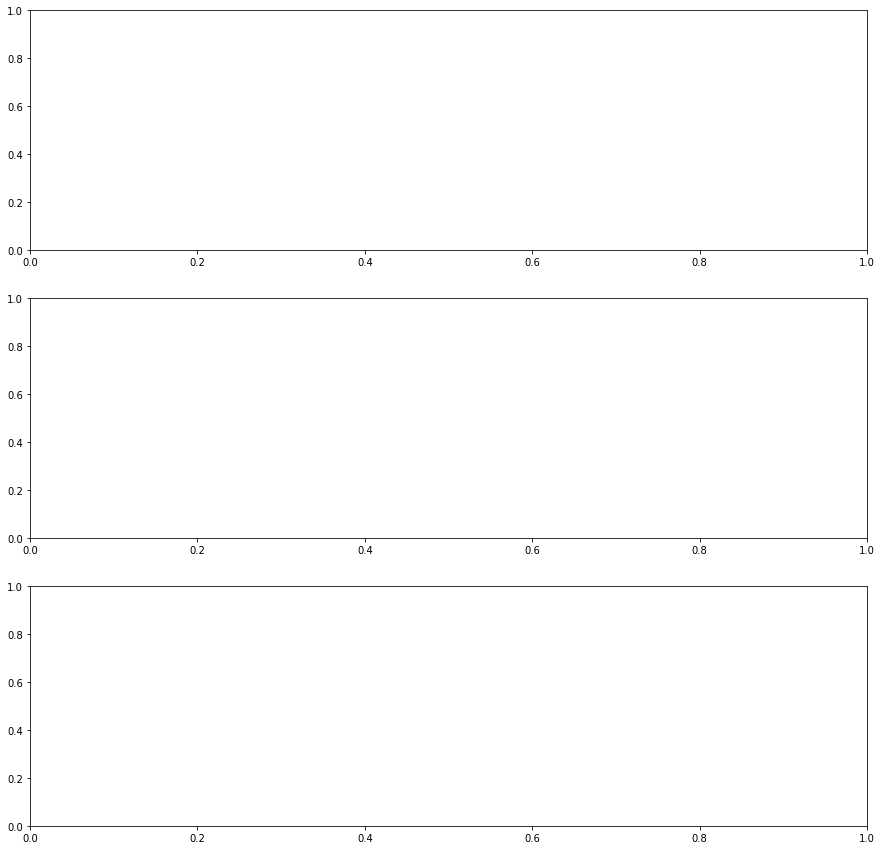

In [19]:
#fig, axes = plt.subplots(3, 1, figsize=(15, 15))

#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

#title = "Learning Curves (5 layer MLP)"
#clf1 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,), solver='sgd', max_iter=10000, random_state=18)
#clf1.fit(train_X, train_y)
# plt.subplot(clf1.loss_curve_)
#plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01), cv=cv, n_jobs=4)

#title = "Learning Curves (10 layer MLP)"
#clf2 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(10,), solver='sgd', max_iter=10000, random_state=18)
#clf2.fit(train_X, train_y)
# plt.subplot(clf2.loss_curve_)
#plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),cv=cv, n_jobs=4)

#title = "Learning Curves (15 layer MLP)"
#clf3 = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(15,), solver='sgd', max_iter=10000, random_state=18)
#clf3.fit(train_X, train_y)
# plt.subplot(clf3.loss_curve_)
#plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01), cv=cv, n_jobs=4)


# plt.show()

In [ ]:
sc = StandardScaler() 
scaled_train_X = sc.fit_transform(train_X)
scaled_test_X = sc.transform(test_X)

In [ ]:
mlp = MLPClassifier(max_iter=5000, random_state=18, early_stopping=True)
param_list = {"hidden_layer_sizes": [(1,),(5,),(10,)], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00001, 0.00005,0.0005]}

gcv = GridSearchCV(estimator=mlp, param_grid=param_list)
gcv.fit(scaled_train_X, train_y)

In [ ]:
print('Best parameters found:\n', gcv.best_params_, gcv.best_score_)

In [ ]:
# title = "Learning Curves (5 layer MLP)"
#clf1 = MLPClassifier(hidden_layer_sizes=(11,8), solver='lbfgs', max_iter=10000, random_state=18, early_stopping=True)
#clf1.fit(scaled_train_X, train_y)
#print (clf1.score(scaled_train_X,train_y))
#print(f"Testing accuracy score: {100* accuracy_score(test_y, clf1.predict(scaled_test_X))}%")
# plt.plot(clf1.validation_scores_)

param_range = np.arange(0, 75, 1)
train_scores, test_scores = validation_curve(
    MLPClassifier(alpha=0.00005, hidden_layer_sizes=(5,), solver='lbfgs', max_iter=100, random_state=18, early_stopping=True), scaled_train_X, train_y, param_name="max_iter", param_range=param_range,
    scoring="accuracy", n_jobs=4)

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with MLP Classifier")
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.ylim(0.55, 0.85)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(16,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train2_X, val_X, train2_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=100)

hist = model.fit(train2_X, train2_y,
          batch_size=32, epochs=150,
          validation_data=(val_X, val_y))


In [ ]:
model.evaluate(test_X, test_y)[1]

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss Train', 'Loss Value', 'Accuracy Train', 'Accuracy Value'], loc='best')
plt.show()

### Boosting

In [10]:
n_learning_rate_steps, n_folds = 10, 10
learning_rates = np.linspace(0.1, 1.0, num=n_learning_rate_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)
trn_err = np.zeros((n_learning_rate_steps, n_folds))
val_err = np.zeros((n_learning_rate_steps, n_folds))
stump = DecisionTreeClassifier(max_depth=1, random_state = 100)
 
for i, rate in enumerate(learning_rates):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump, 
                                   n_estimators=10, learning_rate=rate)
        model.fit(train_X.values[trn, :], train_y.values[trn])
        trn_err[i, j] = 1 - accuracy_score(train_y.values[trn], model.predict(train_X.values[trn, :]))
        val_err[i, j] = 1 - accuracy_score(train_y.values[val], model.predict(train_X.values[val, :]))
trn_err = np.mean(trn_err, axis=1)
val_err = np.mean(val_err, axis=1)
print(f'Training Error {trn_err}, Value Error {val_err}')


Training Error [0.29086248 0.25101727 0.22788412 0.22311814 0.21973338 0.22433768
 0.22178667 0.21822792 0.21489289 0.22722476], Value Error [0.2918582  0.25277156 0.22801937 0.22443896 0.2277988  0.22477302
 0.22466242 0.22130308 0.21615166 0.23037175]


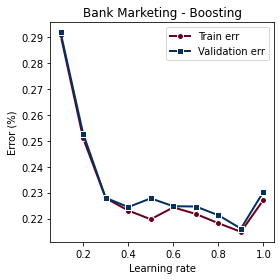

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(learning_rates, trn_err, marker='o', c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(learning_rates, val_err, marker='s', c=cm[1], markeredgecolor='w', linewidth=2)
ax.legend(['Train err', 'Validation err'])
ax.set_title("Bank Marketing - Boosting")
ax.set_xlabel('Learning rate')
ax.set_ylabel('Error (%)')

fig.tight_layout()

In [16]:
n_estimator_steps, n_folds = 2, 10
number_of_stumps = np.arange(2,125, n_estimator_steps)
splitter = StratifiedKFold(n_splits=n_folds, shuffle=True)

trn_acc = np.zeros((len(number_of_stumps), n_folds))
val_acc = np.zeros((len(number_of_stumps), n_folds))
test_acc = np.zeros((len(number_of_stumps), n_folds))

stump = DecisionTreeClassifier(max_depth=1)
for i, n_stumps in enumerate(number_of_stumps):
    for j, (trn, val) in enumerate(splitter.split(train_X, train_y)):
        model = AdaBoostClassifier(algorithm='SAMME', base_estimator=stump,
                                   n_estimators=n_stumps, learning_rate=0.9)
        model.fit(train_X.values[trn, :], train_y.values[trn])

        trn_acc[i, j] = accuracy_score(train_y.values[trn], 
                                           model.predict(train_X.values[trn, :]))
        val_acc[i, j] = accuracy_score(train_y.values[val], 
                                           model.predict(train_X.values[val, :]))
        test_acc[i,j] = accuracy_score(test_y, model.predict(test_X))

trn_acc = np.mean(trn_acc, axis=1)
val_acc = np.mean(val_acc, axis=1)
test_acc = np.mean(test_acc, axis=1)

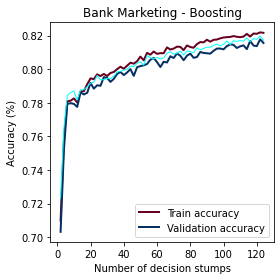

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.plot(number_of_stumps, trn_acc, c=cm[0], markeredgecolor='w', linewidth=2)
ax.plot(number_of_stumps, val_acc, c=cm[1], markeredgecolor='w', linewidth=2)
ax.plot(number_of_stumps, test_acc, c="cyan", markeredgecolor='w', linewidth=1)
ax.legend(['Train accuracy', 'Validation accuracy'])
ax.set_title("Bank Marketing - Boosting")
ax.set_xlabel('Number of decision stumps')
ax.set_ylabel('Accuracy (%)')

fig.tight_layout()

In [13]:
shallow_tree = DecisionTreeClassifier(max_depth=1)
ensemble = AdaBoostClassifier(base_estimator=shallow_tree, 
                                  n_estimators=75, learning_rate=0.9)
ensemble.fit(train_X, train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.9, n_estimators=75)

In [14]:
ypred = ensemble.predict(test_X)
acc = accuracy_score(test_y, ypred)
acc

0.8248992386923422

In [ ]:
title = "Learning Curves (Unpruned Decision Tree)"
dtc = tree.DecisionTreeClassifier(random_state=100)
trainAdaBoost(dtc, title)

In [ ]:
title = "Learning Curves (Pre-pruned Decision Tree)"
dtc_pre = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=3)
trainAdaBoost(dtc_pre, title)

In [ ]:
title = "Learning Curves (Post-pruned Decision Tree)"
dtc_post = tree.DecisionTreeClassifier(ccp_alpha=0.018, random_state=100)
trainAdaBoost(dtc_post, title)

plt.show()

### SVM

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(30, 15))

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

title = "Learning Curves (C5 layer MLP) kernel=rbf"
clf1 = svm.SVC(kernel='rbf', C=15, gamma='auto')
clf1.fit(train_X, train_y)
plot_learning_curve(clf1, title, train_X, train_y, axes=axes[0, :], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C30 layer MLP) kernel=rbf"
clf2 =  svm.SVC(kernel='rbf', C=30, gamma='auto')
clf2.fit(train_X, train_y)
plot_learning_curve(clf2, title, train_X, train_y, axes=axes[1,:], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C45 layer MLP) kernel=rbf"
clf3 = svm.SVC(kernel='rbf', C=45, gamma='auto')
clf3.fit(train_X, train_y)
plot_learning_curve(clf3, title, train_X, train_y, axes=axes[2,:], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C5 layer MLP) kernel=poly"
clf4 = svm.SVC(kernel='poly', C=15, gamma='auto')
clf4.fit(train_X, train_y)
plot_learning_curve(clf4, title, train_X, train_y, axes=axes[3, :], ylim=(0.2, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C30 layer MLP) kernel=poly"
clf5 = svm.SVC(kernel='poly', C=30, gamma='auto')
clf5.fit(train_X, train_y)
plot_learning_curve(clf5, title, train_X, train_y, axes=axes[4,:], ylim=(0.2, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curves (C45 layer MLP) kernel=poly"
clf6 = svm.SVC(kernel='poly', C=45, gamma='auto')
clf6.fit(train_X, train_y)
plot_learning_curve(clf6, title, train_X, train_y, axes=axes[5,:], ylim=(0.2, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [ ]:
print(f'Best Score - C5: {clf1.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C30: {clf2.score(test_X, test_y)*100:.2f}%')
print(f'Best Score - C45: {clf3.score(test_X, test_y)*100:.2f}%')

In [ ]:
import time

kernelList = ['rbf','poly']
CList = [0.1, 1, 3, 10]
degreeList = [1,2,3]
gammaList = [0.01,0.1,1.0]

for i,kernel in enumerate(kernelList):
    for j,c in enumerate(CList):
        if kernel=='poly':
            for l,degree in enumerate(degreeList):
                clf = svm.SVC(kernel=kernel, C=c, degree=degree, cache_size=400)
                
                start=time.process_time()
                clf.fit(train_X, train_y)
                fitTime = time.process_time() - start
                
                testValue = clf.score(train_X, train_y)*100
                trainValue = clf.score(test_X, test_y)*100 
                
                start = time.process_time()
                clf.predict(test_X)
                testTime = time.process_time() - start
                print(f'SVM: {kernel}, {degree}, {c}, {fitTime:.2f}s, {trainValue:.2f}%, {testTime:.2f}s, {testValue:.2f}%')   
        if kernel=='rbf':
            for l,gamma in enumerate(gammaList):
                clf  = svm.SVC(kernel=kernel, C=c, gamma=gamma, cache_size=400)                                
                
                start=time.process_time()
                clf.fit(train_X, train_y)
                fitTime = time.process_time() - start
                
                testValue = clf.score(train_X, train_y)*100
                trainValue = clf.score(test_X, test_y)*100 
                
                start = time.process_time()
                clf.predict(test_X)
                testTime = time.process_time() - start

                print(f'SVM: {kernel}, {gamma}, {c}, {fitTime:.2f}s, {trainValue:.2f}%, {testTime:.2f}s, {testValue:.2f}%')

### KNN

In [ ]:
# try to find best k value
scoreList = []
trainList = []

for i in range(2,40,2):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(train_X, train_y)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, knn2.predict_proba(test_X)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_y,knn2.predict(test_X))
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (f'# Nodes: {i}', auc))
    pred_y = knn2.predict(train_X)
    trainList.append(accuracy_score(train_y, pred_y))
    scoreList.append(knn2.score(test_X, test_y))
    # Custom settings for the plot 

In [ ]:
plt.plot(range(2,40,2), scoreList, label='Testing Accuracy')
plt.plot(range(2,40,2), trainList, label='Training Accuracy')
plt.legend()
plt.title('KNN - Bank Marketing')
plt.xticks(np.arange(2,40,2))
plt.xlabel("K-value")
plt.ylabel("Score")
plt.show()


In [ ]:
acc = max(scoreList)*100
key = scoreList.index(max(scoreList)) *2
print(f'Maximum KNN Score is {acc:.2f}% at {key} neighbors')